## 1. Introduction
According to Trust for America’s Health (TFAH), four in ten American adults have obesity in 2022 and obesity rates continue to climb nationwide and within population groups. It’s important to understand what factors would contribute to obesity and to take action to prevent it. This project used a dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) to estimate obesity levels in people from Mexico, Peru, and Colombia, ranging in age from 14 to 61, with different lifestyles and physical conditions. By using machine learning techniques, we can uncover key factors that influence obesity levels and develop predictive models to identify individuals at risk.

This dataset contains data for estimating of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical conditions.  

Attributes related with eating habits:
* `FAVC` - Frequency of consumption of high calorie foods
* `FCVC` - Frequency of vegetable consumption
* `NCP` - Number of main meals
* `CAEC` - Consumption of food between meals
* `CH20` - Daily water consumption
* `CALC` - Consumption of alcohol

Attributes related with the physical condition:
* `SCC` - Calories consumption monitoring
* `FAF` - Physical activity frequency
* `TUE` - Time using technology devices
* `MTRANS` - Transportation used

Other variables:
* `Gender`
* `Age`
* `Height`
* `Weight`

Target variable:
* `NObeyesdad`: Weight levels

## 2. Exploratory Data Analysis and Feature Engineering 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

In [2]:
# read data and check the first 5 rows
data = pd.read_csv('https://raw.githubusercontent.com/JielingChen/obesity_level_prediction/main/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# check missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

There is no missing data.

In [4]:
# change column names to more informative ones
data.rename(columns={'family_history_with_overweight': 'Family_His', 'FAVC': 'High_Cal_Consume', 
                     'FCVC': 'Veg_Consume', 'NCP': 'Num_Main_Meals', 'CAEC': 'Food_Between_Meals', 
                     'CH2O': 'Water_Consume', 'CALC': 'Alco_Consume', 'SCC': 'Monitor_Cal', 
                     'FAF': 'Phys_Activity', 'TUE': 'Screen_Time',
                     'MTRANS': 'Transportation', 'NObeyesdad': 'Weight_Type'}, inplace=True)
data.head()

,Gender,Age,Height,Weight,Family_His,High_Cal_Consume,Veg_Consume,Num_Main_Meals,Food_Between_Meals,SMOKE,Water_Consume,Monitor_Cal,Phys_Activity,Screen_Time,Alco_Consume,Transportation,Weight_Type
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# check the summary statistics of numerical variables
num = data.select_dtypes(exclude='object')
num.describe()

,Age,Height,Weight,Veg_Consume,Num_Main_Meals,Water_Consume,Phys_Activity,Screen_Time
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
# check the summary statistics of categorical variables
cat = data.select_dtypes(include='object')
cat.describe()

,Gender,Family_His,High_Cal_Consume,Food_Between_Meals,SMOKE,Monitor_Cal,Alco_Consume,Transportation,Weight_Type
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


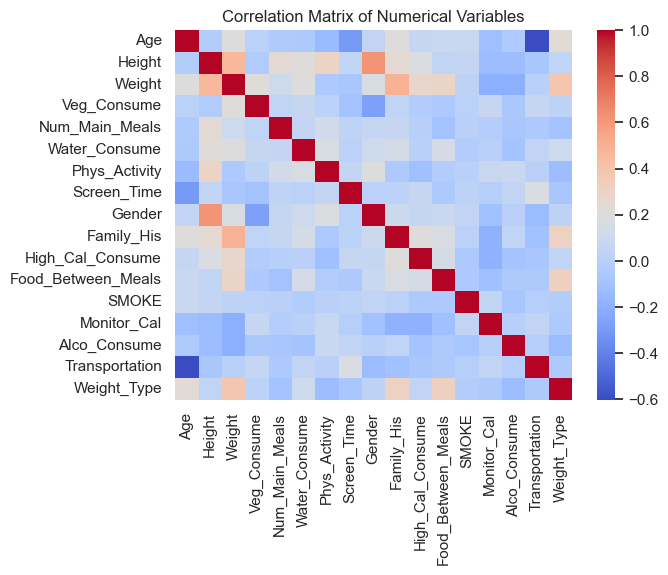

In [7]:
# encode categorical variables to integers and plot the correlation matrix
endoced = data[cat.columns].apply(lambda x: x.astype('category').cat.codes)
endoced_data = pd.concat([data[num.columns], endoced], axis=1)
corr = endoced_data.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

* `Weight_Type` is mostly related with `Weight`.
* `Age` has the least relation with `Weight`.
* `Age` is highly related with `Transportation`.

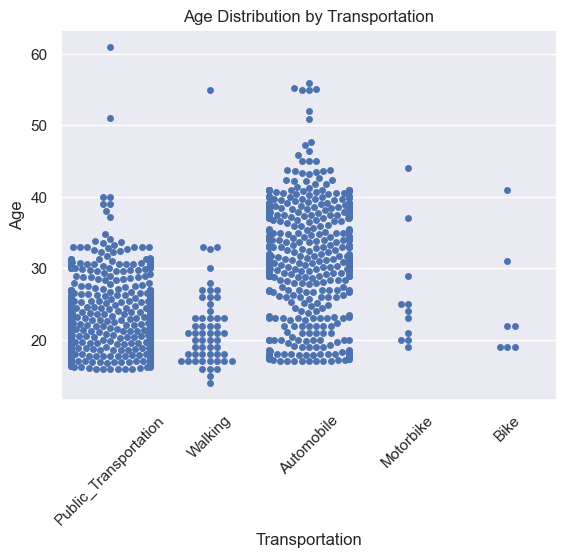

In [8]:
# check the swarmplot of age by transportation
sns.swarmplot(x='Transportation', y='Age', data=data)
plt.title('Age Distribution by Transportation')
plt.xticks(rotation=45)
plt.show()

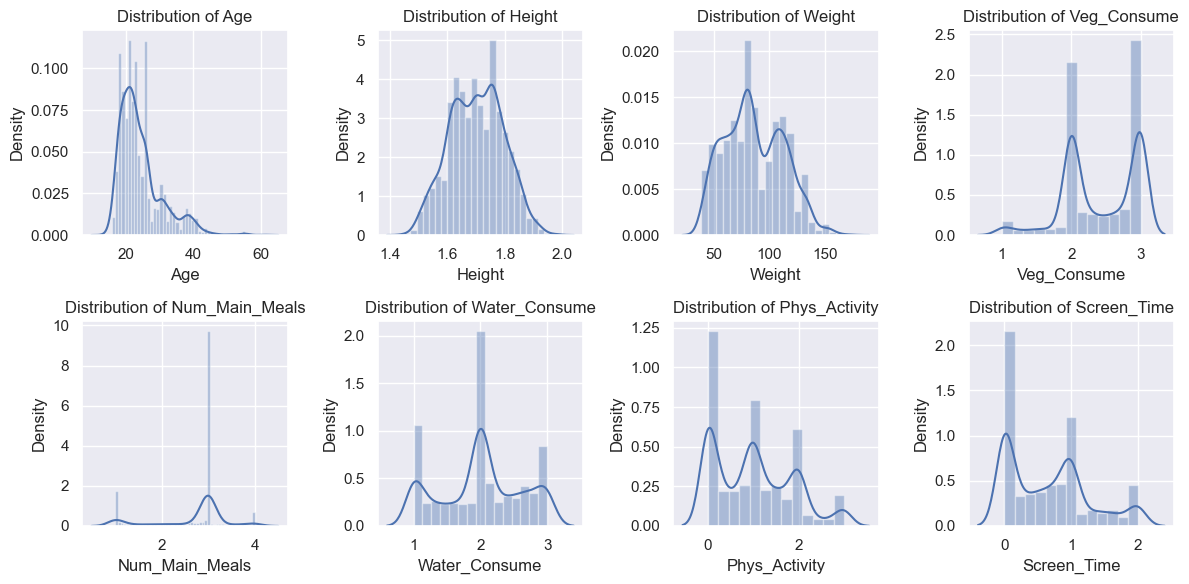

In [9]:
# check the distribution of numerical variables
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
num_columns = list(num.columns)
row = 0
for i, column in enumerate(num_columns):
    if i % 4 == 0 and i > 0:
        row += 1  # move to the next row after 4 plots

    ax = axs[row, i % 4]
    sns.distplot(data[column], ax=ax)
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()  # adjust spacing between subplots
plt.show()

* Most of the samples are young age people.
* Only `Height` and `Weight` are approximately normally distributed.

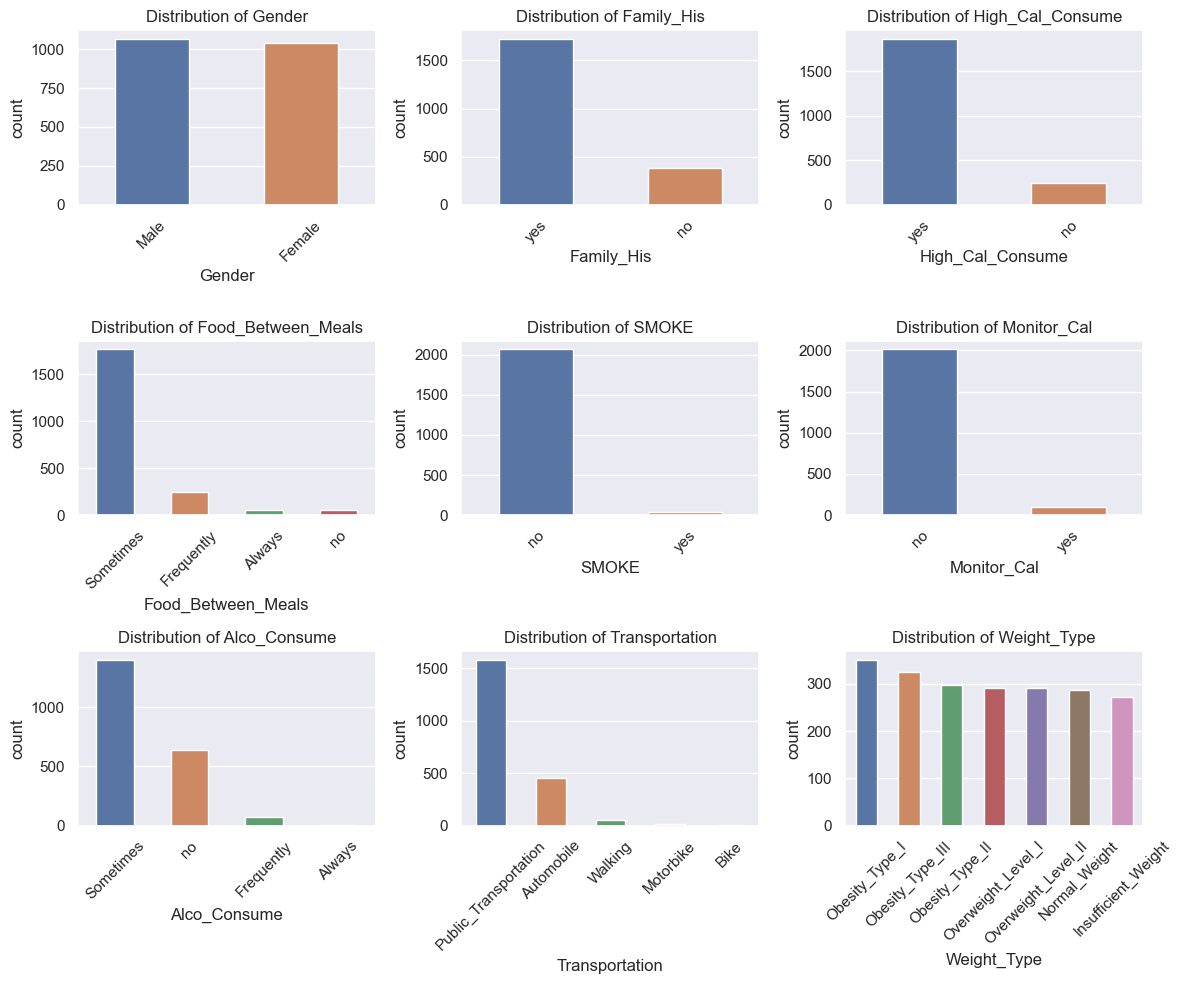

In [10]:
# check the distribution of categorical variables
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
cat_columns = list(cat.columns)
row = 0
for i, column in enumerate(cat_columns):
    if i% 3 == 0 and i > 0:
        row += 1
    ax = axes[row, i % 3]
    order = list(data[column].value_counts().sort_values(ascending=False).index) # sort the categories by counts
    sns.countplot(data=data, x=column, order=order, ax=ax, width=0.5)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

* In the dataset, these are a total of 7 body weight types, including insufficent weight, normal weight, and different levels of overweight and obesity.
* The samples are evenly distributed between male and female, and among different weight types, but are imbalanced in other categorical features.

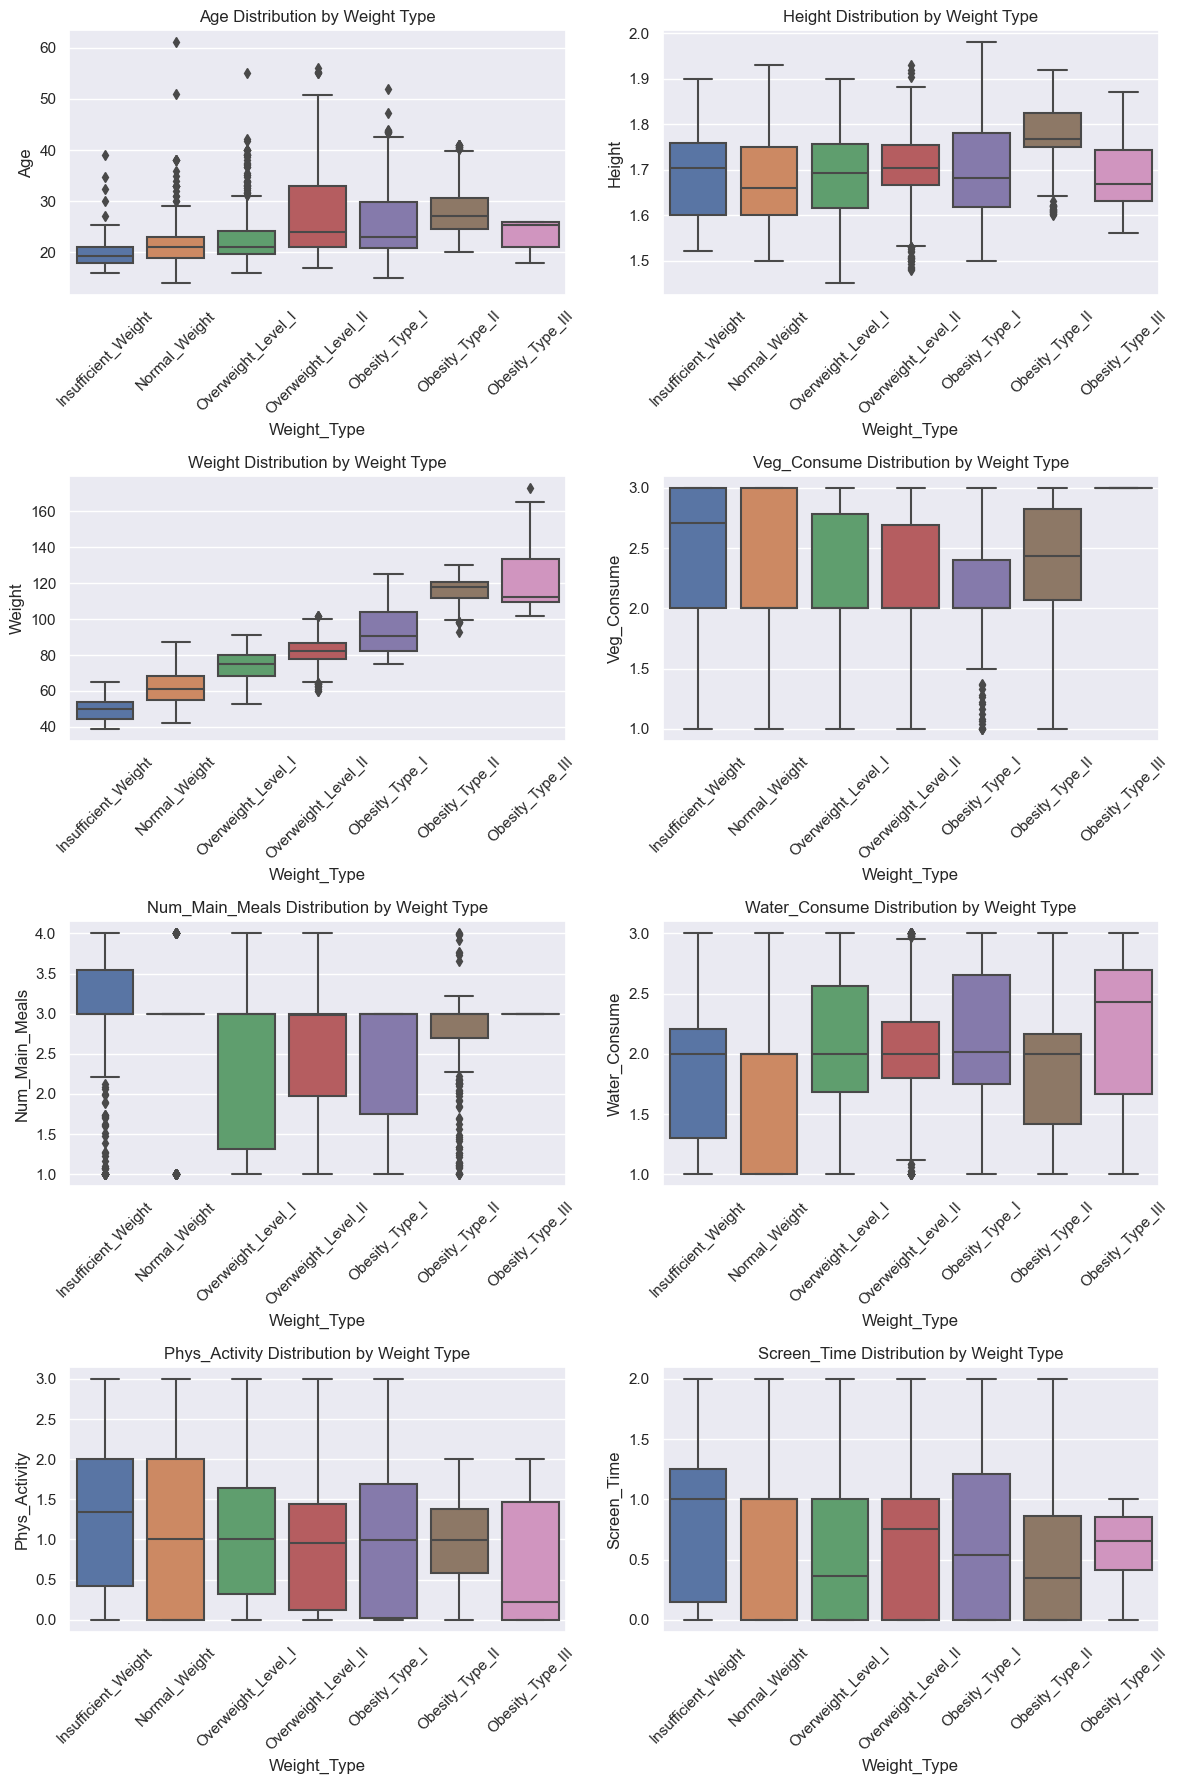

In [11]:
# check the boxplots of numerical variables by obesity type
fig, axes = plt.subplots(4, 2, figsize=(12, 18))
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 
                 'Overweight_Level_I', 'Overweight_Level_II',
                 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
row = 0

for i, column in enumerate(num_columns):
    if i% 2 == 0 and i > 0:
        row += 1
    ax = axes[row, i % 2]
    sns.boxplot(data=data, x='Weight_Type', y=column,
                order=obesity_order, ax=ax)
    ax.set_title(f'{column} Distribution by Weight Type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

plt.tight_layout()
plt.show()

* The distribution of `Weight` varies most by weight type, indicating `Weight` might be the most important feature that influences the classification of obesity type.

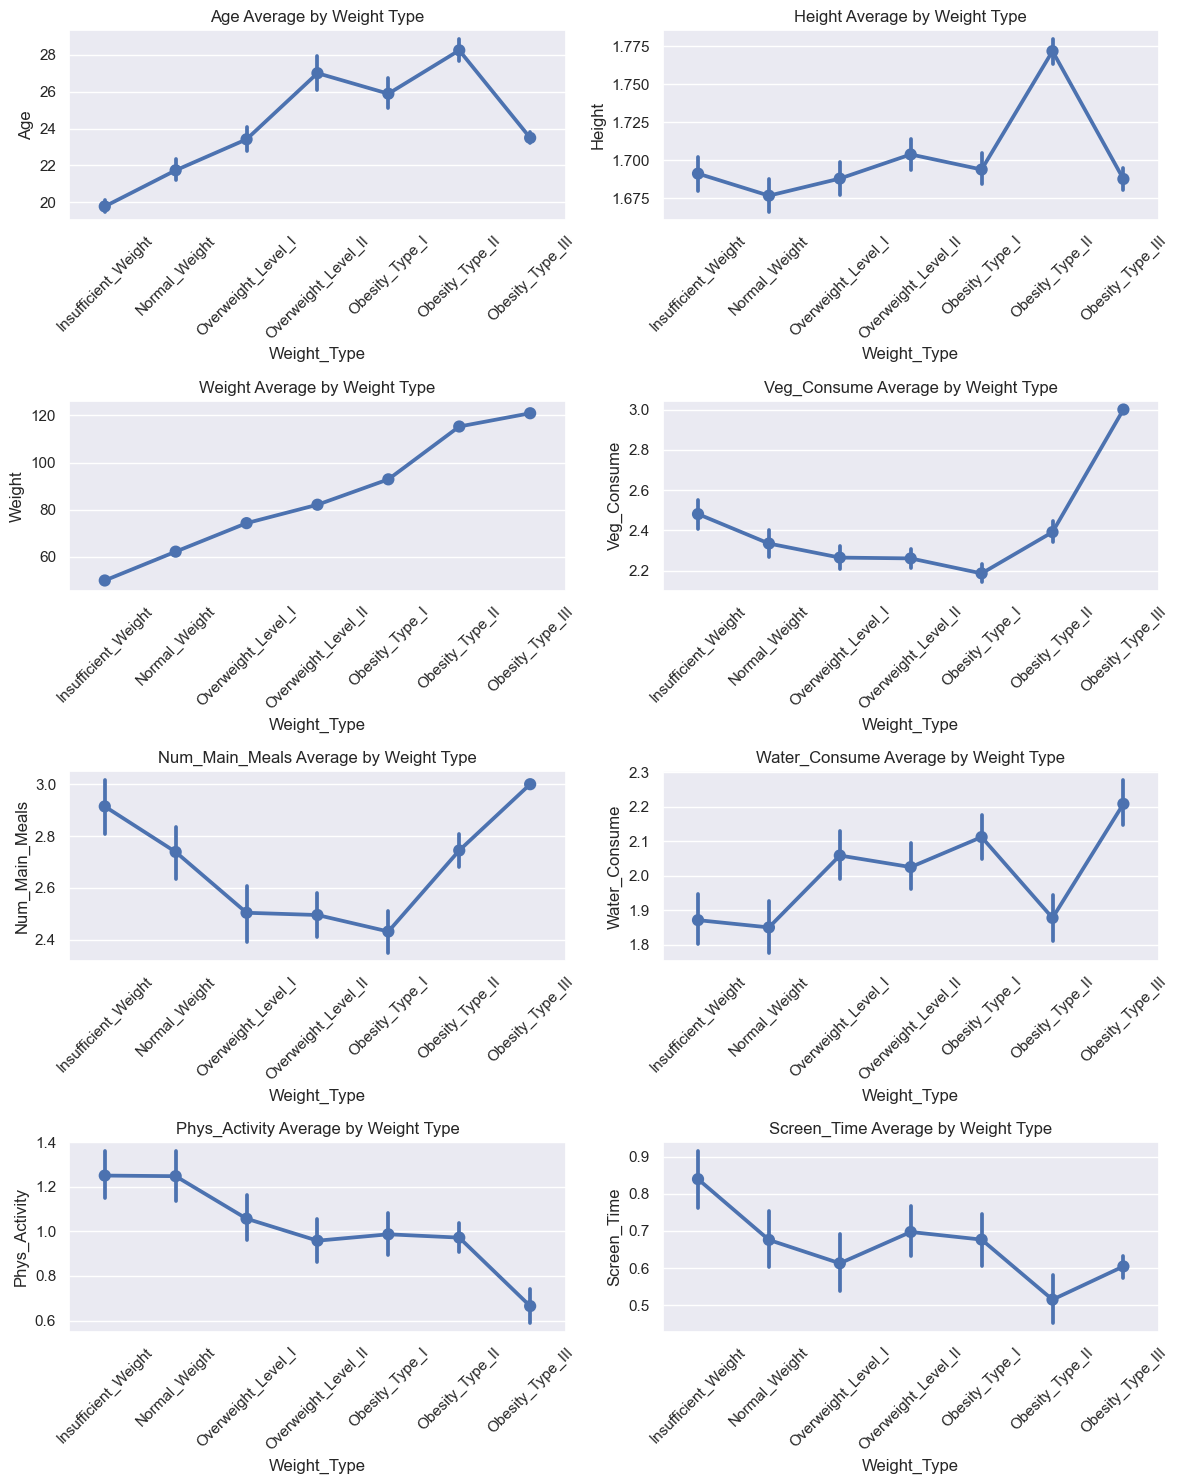

In [12]:
# check the averge of numerical variables by obesity type
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 
                 'Overweight_Level_I', 'Overweight_Level_II',
                 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
row = 0
for i, column in enumerate(num_columns):
    if i% 2 == 0 and i > 0:
        row += 1
    ax = axes[row, i % 2]
    sns.pointplot(data=data, x='Weight_Type', y=column,
                order=obesity_order, ax=ax)
    ax.set_title(f'{column} Average by Weight Type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

* The central tendency of numerical features vary among different weight types, indicating the potential impact.

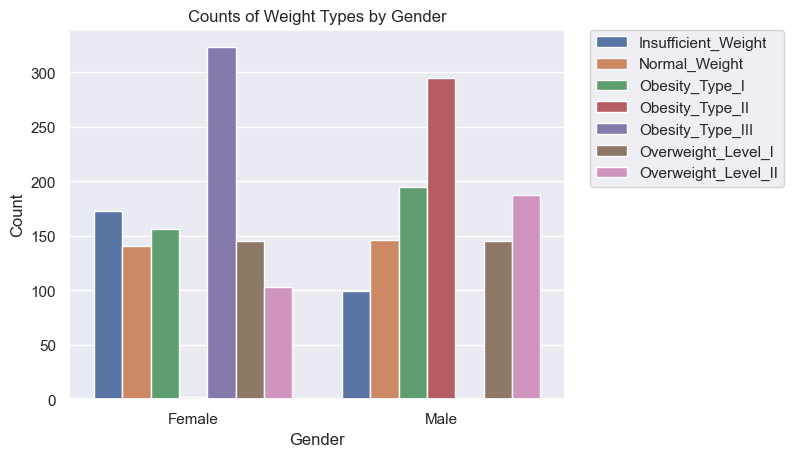

In [13]:
# check the counts of different obesity types by gender
counts = data.groupby(['Gender', 'Weight_Type']).size().reset_index(name='Count')
sns.barplot(data=counts, x='Gender', y='Count', hue='Weight_Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # move the legend outside the plot
plt.title('Counts of Weight Types by Gender')
plt.show()

* Obesity type III only occurs in female, and obesity type II only occurs in male.

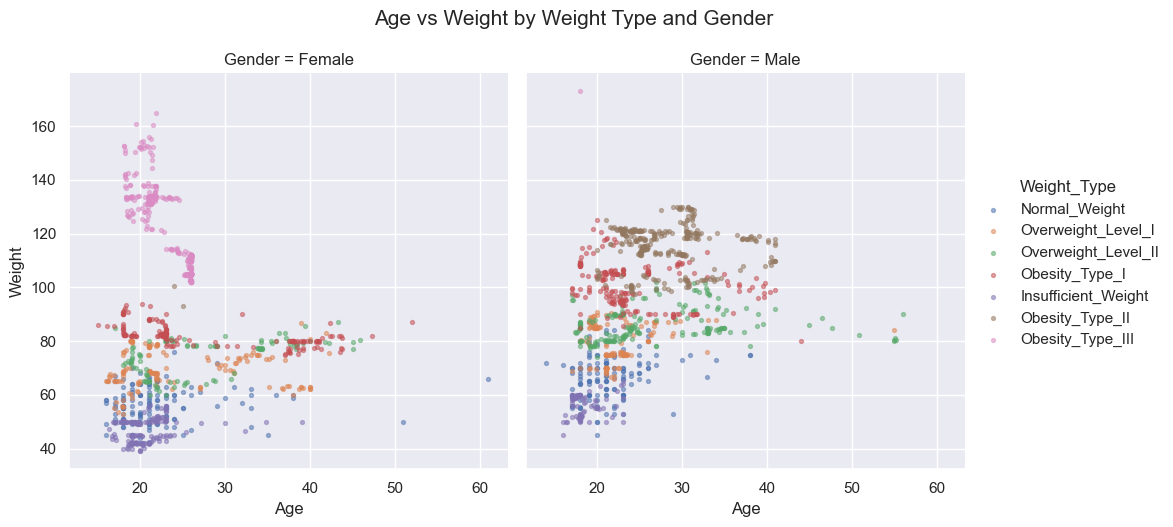

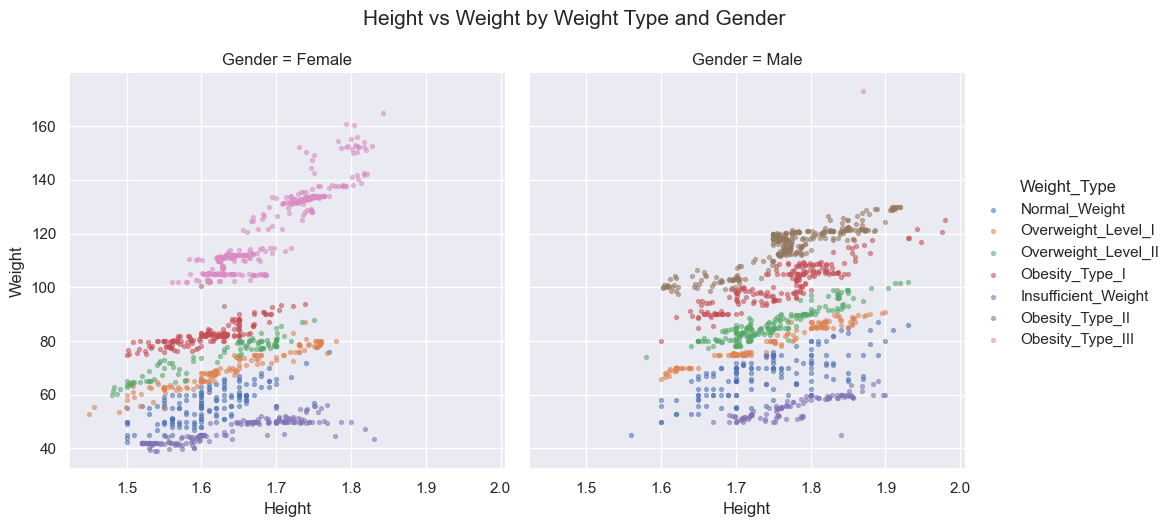

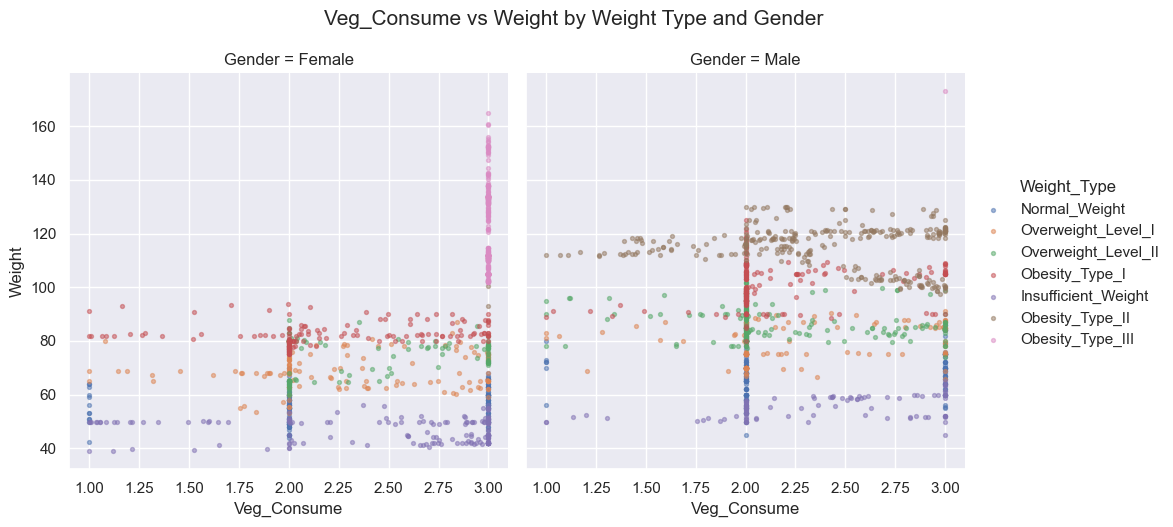

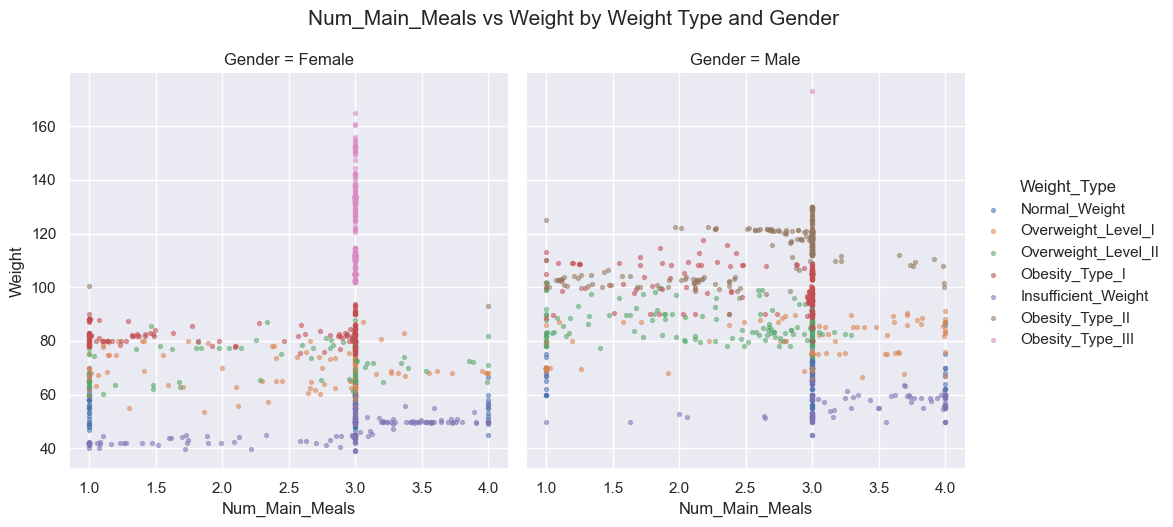

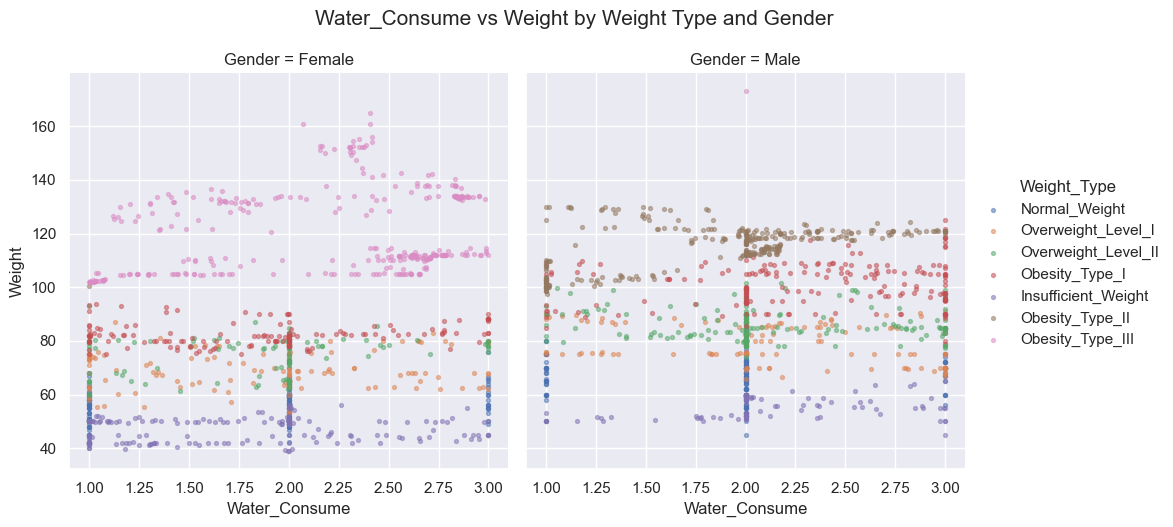

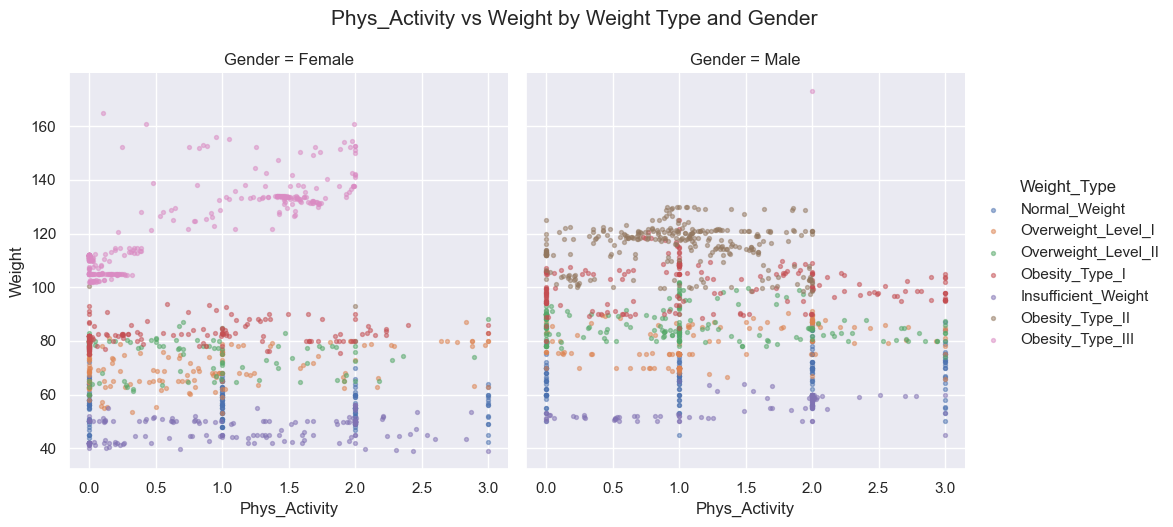

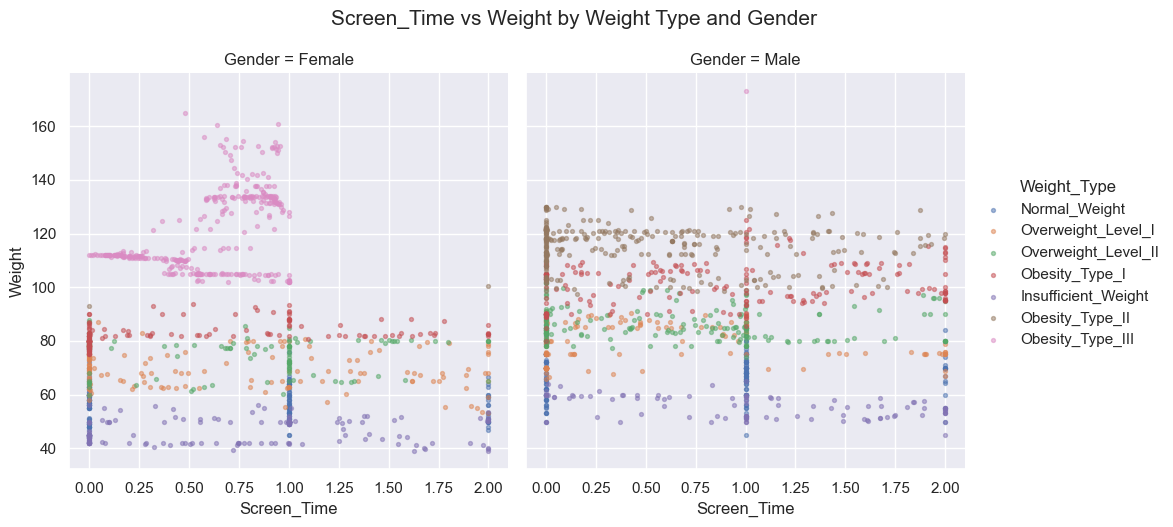

In [14]:
# check the relationship between numerical variables and weight by obesity type and gender
columns = num_columns.copy()
columns.remove('Weight')
for column in columns:
    lmplot = sns.lmplot(data=data, x=column, y='Weight', hue='Weight_Type', 
                        fit_reg=False, scatter_kws={'alpha':0.5, 's': 8}, 
                        col='Gender', col_wrap=2)
    # Set the title for each plot
    plot_title = f"{column} vs Weight by Weight Type and Gender"
    lmplot.fig.suptitle(plot_title, fontsize=15, y=1.05) # y= some height>1 to avoid overlapping with the plots
    plt.show()

## 3. K-Nearest Neighbors and Naive Bayes

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
seed = 1

In [16]:
# split data into features and target
y = data['Weight_Type']
X = data.drop(['Weight_Type'], axis=1)

# dummy encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [17]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.3, 
                                                    random_state = seed, stratify=y_encoded)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# define the models
knn = KNeighborsClassifier(n_neighbors=5)
gnb = GaussianNB()

# cross validation
kf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
results_knn = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
results_gnb = cross_val_score(gnb, X_train, y_train, cv=kf, scoring='accuracy')
print('KNN average accuracy: ', results_knn.mean())
print('Gaussian Naive Bayes average accuracy: ', results_gnb.mean())

KNN average accuracy:  0.7907810352725607
Gaussian Naive Bayes average accuracy:  0.47528172240036637


* Naive Bayes models performs very poorly on this dataset.

In [19]:
# fit the models and make predictions
y_pred_knn = knn.fit(X_train, y_train).predict(X_test)
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [20]:
# generate the classification reports
KNN_report = classification_report(y_test, y_pred_knn)
gnb_report = classification_report(y_test, y_pred_gnb)

In [21]:
print('KNN classification report: \n', KNN_report)

KNN classification report: 
               precision    recall  f1-score   support

           0       0.66      0.89      0.76        82
           1       0.59      0.42      0.49        86
           2       0.81      0.77      0.79       106
           3       0.87      0.97      0.91        89
           4       0.98      0.98      0.98        97
           5       0.72      0.75      0.73        87
           6       0.79      0.68      0.73        87

    accuracy                           0.78       634
   macro avg       0.77      0.78      0.77       634
weighted avg       0.78      0.78      0.78       634



In [22]:
print('Gaussian Naive Bayes classification report: \n', gnb_report)

Gaussian Naive Bayes classification report: 
               precision    recall  f1-score   support

           0       0.41      0.78      0.54        82
           1       0.46      0.07      0.12        86
           2       0.29      0.88      0.43       106
           3       0.75      0.03      0.06        89
           4       0.99      0.98      0.98        97
           5       0.44      0.18      0.26        87
           6       0.60      0.03      0.07        87

    accuracy                           0.44       634
   macro avg       0.56      0.42      0.35       634
weighted avg       0.56      0.44      0.36       634



In [23]:
# print the classes and corresponding labels
classes = le.classes_
for label, cls in enumerate(classes):
    print(f'Label: {label}, Class: {cls}')

Label: 0, Class: Insufficient_Weight
Label: 1, Class: Normal_Weight
Label: 2, Class: Obesity_Type_I
Label: 3, Class: Obesity_Type_II
Label: 4, Class: Obesity_Type_III
Label: 5, Class: Overweight_Level_I
Label: 6, Class: Overweight_Level_II


#### Interpretation of the Classification Reports

* The accuracy of the K-Nearest Neighbors model is 0.78, which means that 78% of predictions of the test data are correct, while the accuracy of the Naïve Bayes model is only 0.44, which is significantly lower than the KNN model, meaning that Naïve Bayes is not a suitable model for this data set.
* The reason why Naïve Bayes performs poorly on this dataset is that the Naïve Bayes model assumes that the feature variables are all independent of each other, while in the exploratory data analysis, we found that the variables are related to each other to some extent, which violates the assumption of the Naïve Bayes algorithm and thus compromises the performance of the model. 

* Precision = True Positive / (True Positive + False Positive). It measures how many percent of the positive values identified by the model are true positive values. 
* Recall = True Positive / (True Positive + False Negative). It measures how many percent of the true positive values can be correctly identified by the model. 
* F1-score is the harmonic mean of precision and recall, which balances both precision and recall. 
* Support represents the number of samples in each class. From the reports we can see that the classes in the test data set are very well balanced. 
* The macro average calculates the average performance across all classes, giving equal weight to each class, while the weighted average is weighted by the number of samples in each class.

* The macro average precision, recall, and F1-score of the KNN model are 0.77, 0.78 and 0.77 respectively,  while those of the Naïve Bayes model are 0.56, 0.42, and 0.35 respectively. The weighted average precision, recall, and F1-score of the two models are very close to the macro average of these two models. 
* The precision, recall, and F1-score of Obesity Type III are all very high in both models, indicating that both models perform very well in identifying Obesity Type III. 

## 4. Model Selection

Next I will try various models to choose the best model for predicting weight types.

In [24]:
# try different classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
seed = 1

In [25]:
# scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [26]:
# define various models
models = [KNeighborsClassifier(n_neighbors=5), 
          DecisionTreeClassifier(random_state=seed), 
          RandomForestClassifier(random_state=seed), 
          GradientBoostingClassifier(random_state=seed), 
          AdaBoostClassifier(random_state=seed, base_estimator=DecisionTreeClassifier(random_state=seed)), 
          SVC(random_state=seed, probability=True)]

# define a dataframe to store the cross validation results
df_cv_results = pd.DataFrame(columns=['model', 'cv_mean', 'cv_std'])
for model in models:
    kf = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_scaled, y_encoded, cv=kf, scoring='accuracy')
    df_cv_results.loc[models.index(model), 'model'] = model.__class__.__name__
    df_cv_results.loc[models.index(model), 'cv_mean'] = cv_results.mean()
    df_cv_results.loc[models.index(model), 'cv_std'] = cv_results.std()

# sort the results by cv_mean
df_cv_results = df_cv_results.sort_values(by='cv_mean', ascending=False).reset_index(drop=True)

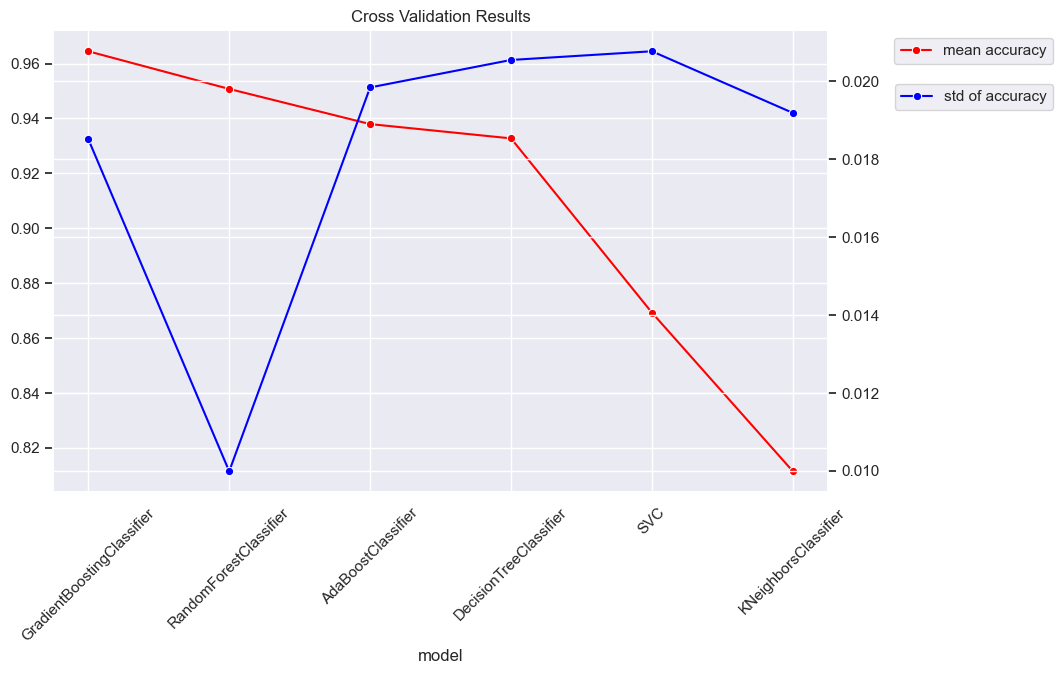

In [27]:
# plot the cross validation results
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

sns.lineplot(data=df_cv_results, x='model', y='cv_mean', marker='o', 
             color='red', ax=ax1, label='mean accuracy')
sns.lineplot(data=df_cv_results, x='model', y='cv_std', marker='o', 
             color='blue', ax=ax2, label='std of accuracy')

ax1.set_xticklabels(labels=df_cv_results['model'], rotation=45)
ax1.set_ylabel('')
ax2.set_ylabel('')

# set the legend outside the plot
ax1.legend(bbox_to_anchor=(1.3, 1))
ax2.legend(bbox_to_anchor=(1.3, 0.9))

plt.title('Cross Validation Results')
plt.show()

In [28]:
print(df_cv_results)

                        model   cv_mean    cv_std
0  GradientBoostingClassifier  0.964459  0.018514
1      RandomForestClassifier  0.950733  0.009991
2          AdaBoostClassifier  0.937935   0.01984
3      DecisionTreeClassifier  0.932726  0.020546
4                         SVC  0.869259  0.020769
5        KNeighborsClassifier  0.811473  0.019187


* The predictions of tree-based models (Gradient Boosting, Random Forest, Decision Tree and AdaBoost) are more accurate and have relatively lower standard deviations. 
* Gradient Boosting model is the best model with the highest average accuracy.

## 5. Hyperparameter Tuning

The hyperparameters I used in the previous cross-validation process are default hyperparameters, which might not be optimal in balancing the variance-bias tradeoff of the gradient boosting model.  
Next, I will use random search to find the better hyperparameter combination to improve the model performance.

In [29]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size = 0.2, 
                                                    random_state=seed, stratify=y_encoded)
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# hyperparameter grid for Gradient Boosting Classifier
param_grid = {'n_estimators': [200, 300, 400, 500, 600, 700], 
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 
              'max_depth': [4, 5, 6, 7, 8, 9], 
              'min_samples_split': [2, 3, 4, 5, 6, 7], 
              'min_samples_leaf': [2, 3, 4, 5, 6, 7]}
gbc = GradientBoostingClassifier(random_state=seed)
random_search = RandomizedSearchCV(gbc, param_grid, 
                                   cv=5, scoring='accuracy', refit=True,
                                   n_iter=10, random_state=seed, n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700]},
                   random_state=1, scoring='accuracy', verbose=1)

In [35]:
# check the best parameters and best score
best_params = random_search.best_params_
print('Best parameters: ', best_params)
print('Best score: ', random_search.best_score_.round(4))

Best parameters:  {'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 4, 'learning_rate': 0.1}
Best score:  0.971


* The best model configuration for the Gradient Boosting Classifier consists of 500 boosting stages, with a minimum of 6 samples required for splitting and being at a leaf node, a maximum tree depth of 4, and a learning rate of 0.1. 
* The model configured with the best hyperparameters achieved an accuracy score of approximately 0.971, which is higher than the 0.9645 obtained with the default hyperparameters.

## 6. Model Validation

Test the tuned model on the test data:

In [32]:
# evaluate the best model on the test data
best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(X_test)

In [33]:
print(f'Classificaiton report: \n {classification_report(y_test, y_pred)}')

Classificaiton report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.93      0.97      0.95        58
           2       0.97      0.97      0.97        70
           3       0.97      0.97      0.97        60
           4       1.00      0.98      0.99        65
           5       0.97      0.97      0.97        58
           6       0.98      1.00      0.99        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



* The model achieves an accuracy of 0.97 on the test data, indicating that the model doesn't overfit and can be useful for prediction on unseen data.
* The model has balanced performance for different weight types.

## 7. Business Insights

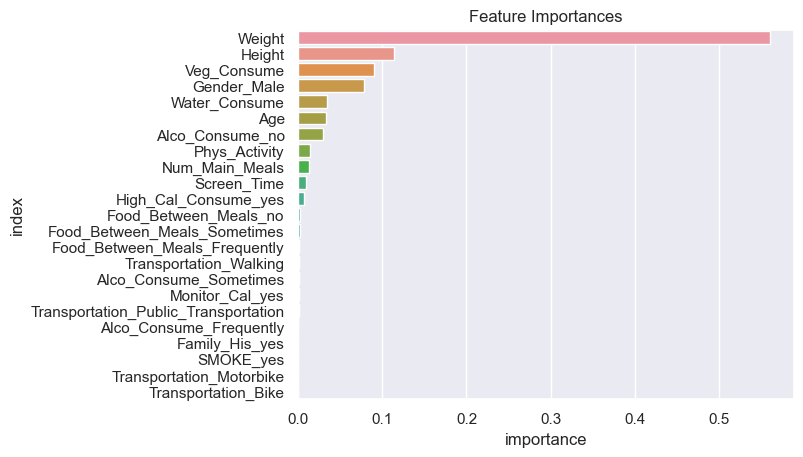

In [34]:
# plot the feature importances
feature_importances = best_estimator.feature_importances_
feature_importances_df = pd.DataFrame(feature_importances, 
                                      index=X_encoded.columns, 
                                      columns=['importance'])
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False).reset_index()
sns.barplot(data=feature_importances_df, x='importance', y='index')
plt.title('Feature Importances')
plt.show()

* Weight is the most important factor in predicting a person's weight type.
* Height, vegetable consumption and gender also play an important role in a person's weight type.
* Other contributing factors include age, whether the person consume alcohol or not, physical activity level, number of main meals, screen time, water consumption, family history, and high calorie consumption.